In [1]:
from pyspark import SparkContext

In [2]:
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [3]:
sc=SparkContext()

In [4]:
ssc=StreamingContext(sc,10)
sqlContext=SQLContext(sc)

In [9]:
socket_stream=ssc.socketTextStream('127.0.0.1',5558)

In [10]:
lines=socket_stream.window(20)

In [11]:
from collections import namedtuple
fields=('tag','count')
Tweet=namedtuple('Tweet',fields)

In [12]:
(lines.flatMap(lambda text:text.split())
.filter(lambda word:word.lower().startswith('#'))
.map(lambda word:(word.lower(),1))
.reduceByKey(lambda a,b:a+b)
.map(lambda rec:Tweet(rec[0],rec[1]))
.foreachRDD(lambda rdd:rdd.toDF().sort(desc('count'))
.limit(10).registerTempTable("tweets")))

# Run tweetread.py file

In [13]:
ssc.start()

In [14]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

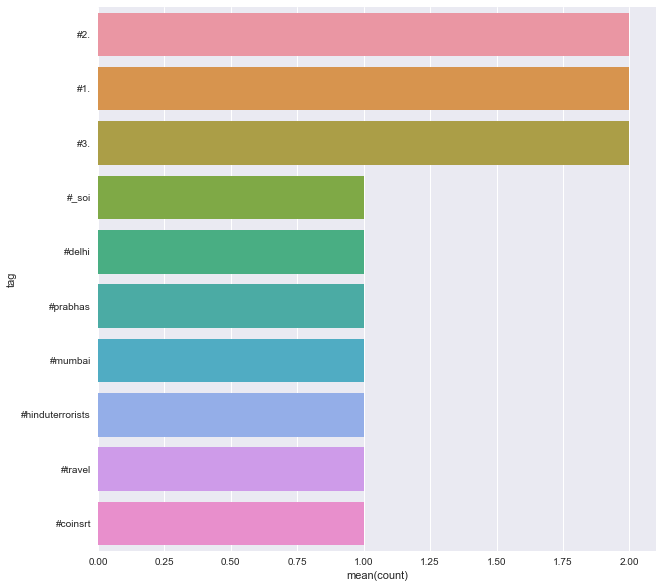

In [16]:
count=0
while count<10:
    time.sleep(3)
    top_10_tweets=sqlContext.sql('Select tag,count from tweets')
    top_10_df=top_10_tweets.toPandas()
    display.clear_output(wait=True)
    sns.plt.figure(figsize=(10,10))
    sns.barplot(x='count',y='tag',data=top_10_df)
    sns.plt.show()
    count=count+1

In [17]:
ssc.stop()